## About the Sklearn Digit Dataset

This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py

### Loading the digits dataset

In [154]:
from sklearn.datasets import load_digits
#load_digits is the function used to load the digits dataset from sklearn module
dataset=load_digits()

### Setting up the data, target and images 

In [155]:
data=dataset.data
target=dataset.target
images=dataset.images

In [156]:
print('data shape:',data.shape)
print('images shape:',images.shape)
print('data shape:',target.shape)

data shape: (1797, 64)
images shape: (1797, 8, 8)
data shape: (1797,)


- Images are of 8x8 dimension

- We have 64 features in data with 1797 records or digits

- and 1797 target values

### original version of one image

In [157]:
print(data[6])  

[ 0.  0.  0. 12. 13.  0.  0.  0.  0.  0.  5. 16.  8.  0.  0.  0.  0.  0.
 13. 16.  3.  0.  0.  0.  0.  0. 14. 13.  0.  0.  0.  0.  0.  0. 15. 12.
  7.  2.  0.  0.  0.  0. 13. 16. 13. 16.  3.  0.  0.  0.  7. 16. 11. 15.
  8.  0.  0.  0.  1.  9. 15. 11.  3.  0.]


- data contains the faltten version and we have 64 pixel values. We will more understand this by below diagram

### Visaulization

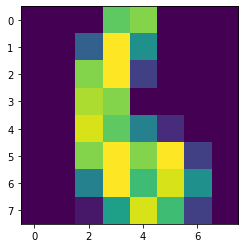

In [158]:
from matplotlib import pyplot as plt

plt.imshow(images[6])
plt.show()

### Grey Scale Visualization

We will see it in grey cmap for better understanding..

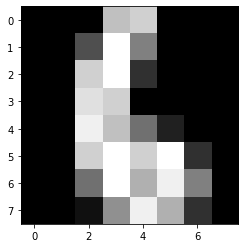

In [159]:
from matplotlib import pyplot as plt

plt.imshow(images[6],cmap='gray')
plt.show()

### Flatten Version of Image

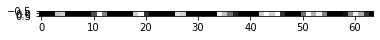

In [160]:
plt.imshow(images[6].reshape(1,64),cmap='gray')

### 8x8 matrix version of image

In [161]:
print(images[6])

[[ 0.  0.  0. 12. 13.  0.  0.  0.]
 [ 0.  0.  5. 16.  8.  0.  0.  0.]
 [ 0.  0. 13. 16.  3.  0.  0.  0.]
 [ 0.  0. 14. 13.  0.  0.  0.  0.]
 [ 0.  0. 15. 12.  7.  2.  0.  0.]
 [ 0.  0. 13. 16. 13. 16.  3.  0.]
 [ 0.  0.  7. 16. 11. 15.  8.  0.]
 [ 0.  0.  1.  9. 15. 11.  3.  0.]]


- Majority of the image is black. And the value of background is inverted to black and the foreground is inverted to pixel values.
- This is 2D flatten version of the image(8x8)

In [162]:
print(target[:5])

[0 1 2 3 4]


### Image Thresholding

If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

cv2.THRESH_BINARY

cv2.THRESH_BINARY_INV

cv2.THRESH_TRUNC

cv2.THRESH_TOZERO

cv2.THRESH_TOZERO_INV

In [163]:
import cv2

ret,data=cv2.threshold(data,7,15,cv2.THRESH_BINARY)
ret,images_new=cv2.threshold(images,7,15,cv2.THRESH_BINARY)

### How to install OpenCV in Windows?

https://medium.com/@pranav.keyboard/installing-opencv-for-python-on-windows-using-anaconda-or-winpython-f24dd5c895eb 

### After Image Thresholding

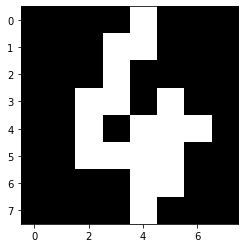

In [164]:
from matplotlib import pyplot as plt

plt.imshow(images_new[100],cmap='gray')
plt.show()

### Splitting of Dataset

In [165]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2)

### KNeighborsClassifier Algorithm

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
knn=KNeighborsClassifier()

### Model Running and Different Evaluation Metrics

In [176]:
def model_eval(algo, xtrain, ytrain, xtest, ytest):
    algo.fit(xtrain,ytrain)

    print("Train Results \n")
    y_train_pred  = algo.predict(xtrain)
    y_train_prob = algo.predict_proba(xtrain)[:,1]

    print("Confusion Matrix for Train : \n", confusion_matrix(ytrain, y_train_pred))
    print("Accuracy Score for Train : \n", accuracy_score(ytrain, y_train_pred))

    print("+"*50)
    print("Test Results \n")
    y_test_pred  = algo.predict(xtest)
    y_test_prob = algo.predict_proba(xtest)[:,1]

    print("Confusion Matrix for Test : \n", confusion_matrix(ytest, y_test_pred))
    print("Accuracy Score for Test : \n", accuracy_score(ytest, y_test_pred))

### Applying the Function

In [177]:
model_eval(knn, X_train, y_train, X_test, y_test)

Train Results 

Confusion Matrix for Train : 
 [[139   0   0   0   0   1   0   0   0   0]
 [  0 112   5   0   0   1   4   0   6   3]
 [  2   5 126   3   0   0   1   1   3   0]
 [  0   2   1 131   0   3   1   2   2   7]
 [  1   5   0   0 130   0   0   5   1   0]
 [  0   0   0   1   1 136   2   0   0   8]
 [  3   2   0   0   1   0 138   0   0   0]
 [  0   0   1   0   1   0   0 145   0   0]
 [  0  17   1   5   0   3   4   2 114   0]
 [  2   6   0   3   2   4   0   8   3 121]]
Accuracy Score for Train : 
 0.8990953375086986
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Results 

Confusion Matrix for Test : 
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 42  3  0  0  0  1  0  4  1]
 [ 0  3 29  1  0  0  0  2  1  0]
 [ 0  0  1 30  0  0  0  2  0  1]
 [ 0  4  0  0 34  0  0  1  0  0]
 [ 0  0  0  2  1 26  0  0  0  5]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  3  0  0  0  1  1  0 23  0]
 [ 1  1  0  4  0  1  0  2  0 22]]
Accuracy Score for Test : 
 0.8666666666666667


- We will try to tune k_neighbors in the KNeighborsClassifier

### Tunning KNN

In [169]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
List = list(range(1,30))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = List[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 9


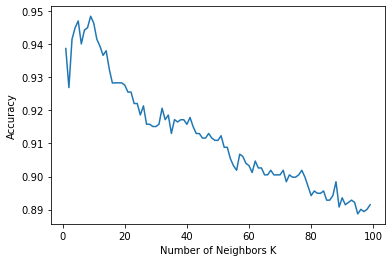

In [170]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(k_neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

In [171]:
from sklearn.metrics import confusion_matrix
final = KNeighborsClassifier(n_neighbors=best_k)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(accuracy_score(y_test, predicted))

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  3  0]
 [ 0  1 35  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  1  0  1]
 [ 0  2  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  1 30  0  0  0  3]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  2  0  1  0  0  0  0 25  0]
 [ 0  1  0  4  0  0  0  0  0 26]]
0.9444444444444444


- We will try Random Forest with tunning n_estimators.

### Tunning Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier
myList = list(range(1,100))

cv_scores = []
n_estimators = []
for k in myList:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    n_estimators.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_n = myList[MSE.index(min(MSE))]
print ("The optimal number of n_estimators is %d" % best_n)

The optimal number of n_estimators is 82


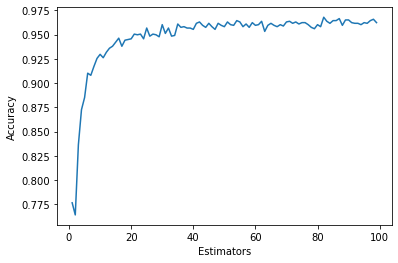

In [174]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(n_estimators, cv_scores)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()

In [175]:
#Build Final Model
from sklearn.metrics import confusion_matrix
final = RandomForestClassifier(n_estimators=best_n)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
print('Confusion Matrix : \n',confusion_matrix(y_test,predicted))
print('Accuracy Score : \n',accuracy_score(y_test, predicted))

Confusion Matrix : 
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 48  1  0  0  0  0  1  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  1 30  0  0  0  3]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  0]
 [ 0  2  0  0  0  1  0  0 25  0]
 [ 0  0  0  1  0  0  0  0  1 29]]
Accuracy Score : 
 0.9638888888888889
